## Lab4
## Submit By: Yuhao Wang

<strong>Sometimes, the recruiters and prospective students are consistent with same needs.</strong> For example, most of recruiters are looking for the person according to the market's need, and at the same time, students always want to apply for the university with the prevalent courses for future study. Based on this idea, I choose data from linkedin's survery, which includes the top 10 skills of 2016 on Linkedin, as expected, SCU's MSIS program offers many courses to teach these popular skills when I compared the course data from SCU MSIS's website. <br />

At the same time, <strong>alumni situation will be the another important factor that would influence prospective students' decision</strong>, so I get the MSIS alumni data from linkedin. Their location, their company, their job can help us find some interesting things.<br />

Besides, I will develop a geo-map to display the company locations, so it can help me explain the geographical advantage for choosing university<br />

<strong>Take away:<strong>SCU MSIS program has designed and offered lots of courses with hot skills for students, and the geographical advantage would be a good point for recruiters and prospective studens. However, there is still some room for improvement, for example, there are still many students choose to other industry rather than IT, and there are still 4 skills that SCU MSIS Program cannot offer.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from lxml import html
from urllib2 import urlopen
from bs4 import BeautifulSoup
import codecs
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


<strong>Because of legal problem of crawler, I choose to save a static html rather than develop any crawler program to collect data from Linkedin (from 2016, there are over 100 individuals sued by linkedin owing to crawler).</strong>

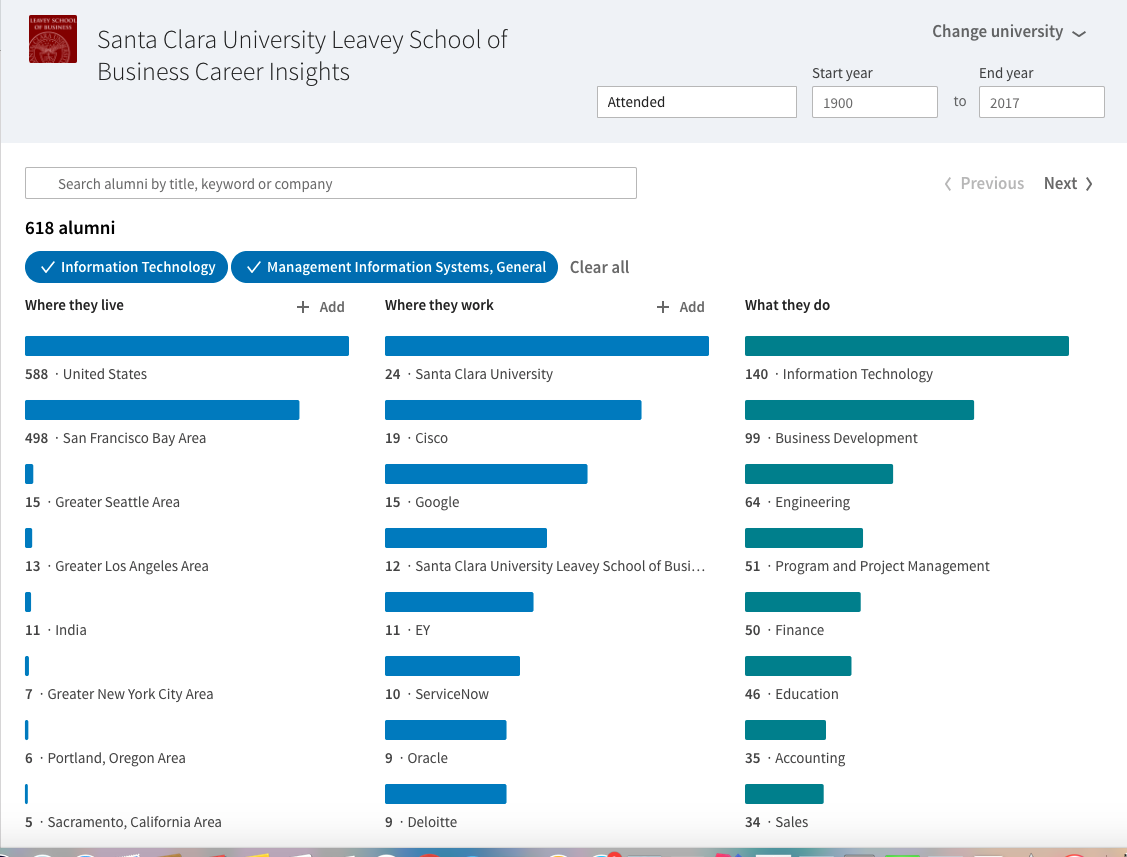

In [24]:
from IPython.display import Image
Image(filename='test.png')

In [25]:
f = codecs.open("test.html", 'r', 'utf-8')
page = f.read()
tree = html.fromstring(page)
city = tree.xpath('//span[@class="org-bar-graph-element__category"]/text()')

In [26]:
soup = BeautifulSoup(page, 'html.parser')
num = soup.find_all('strong')

In [27]:
import re
for i in range(0, len(num)):
    num[i] = re.sub('<[^>]*>', '', str(num[i]))
    num[i] = num[i]

In [28]:
df = pd.DataFrame({"Where they live": city, "num": num})

In [29]:
df1 = df[1:15].reset_index().ix[:,1:]
df2 = df[15:30].reset_index().ix[:,1:]
df3 = df[30:45].reset_index().ix[:,1:]
df4 = df[60:75].reset_index().ix[:,1:]

In [30]:
df2 = df2.rename(columns={ 'Where they live' : 'Where they work'})
df3 = df3.rename(columns={ 'Where they live' : 'What they do'})
df4 = df4.rename(columns={ 'Where they live' : 'What they are skilled at'})

In [31]:
df2.num = df2.num.astype(int)

In [32]:
df2["Where they work"][0] = "SCU"
df2["Where they work"][3] = "SCU Leavey"

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

<strong>In next two steps, I would develop two pie charts to illustarte the alumni's residence. We can easily know from these two charts, alumni choose to stay Bay Area after graduating. So we can do some backward inference, they reason of they choose MSIS program is that they want to stay in Bay Area after graduating.</strong>

In [34]:
trace = go.Pie(labels=df1["Where they live"], values=df1.num, textinfo='none')
layout = go.Layout(
    title='Where they live',
)
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig, filename='Where they live')

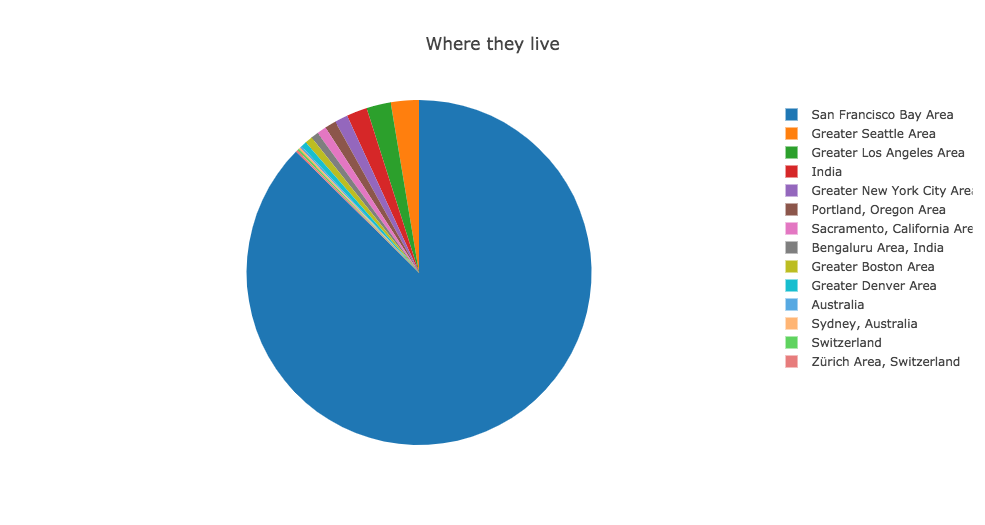

In [35]:
Image(filename='pie1.png')

In [36]:
fig = {
  "data": [
    {
      "values": list(df1.num),
      "labels": list(df1["Where they live"]),
      "domain": {"x": [0, 2]},
      "name": "GHG Emissions",
      "hoverinfo":"label+percent+name",
      "textinfo":"none",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Where they live",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "AREA",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')


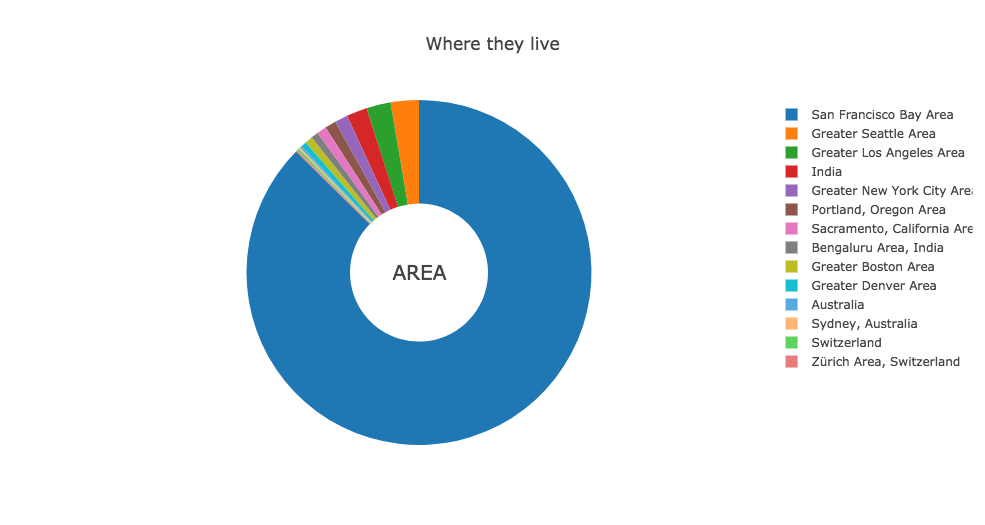

In [37]:
Image(filename='pie2.png')

<strong>In this step, I develop a bar chart to display the work place of alumni, most of them are choosing to IT company after graduating.</strong>

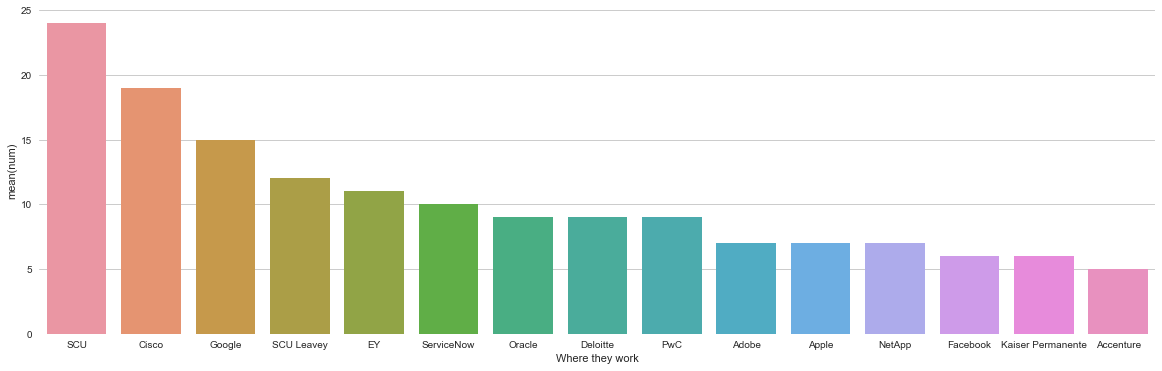

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 6))
plt.ylabel("Where they work")
plt.xlabel("Number of Students")
ax.legend(ncol=7, loc="topper middle", frameon=True)
sns.despine(left=True, bottom=True)
place = sns.barplot(x="Where they work", y="num", data=df2)


<strong>In this step, I also develop a bar chart to display the job of alumni, most of them do the job consistent with Information System after graduating.</strong>

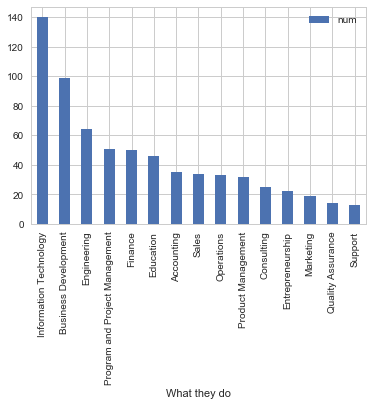

In [39]:
df3.num = df3.num.astype(int)
df3.plot.bar(x='What they do', y='num')

<strong>In this step, I still use a bar chart to display the skills of alumni, most of skills among them belong to technical skill, so information system give them a lot in their personal skill trees.</strong>

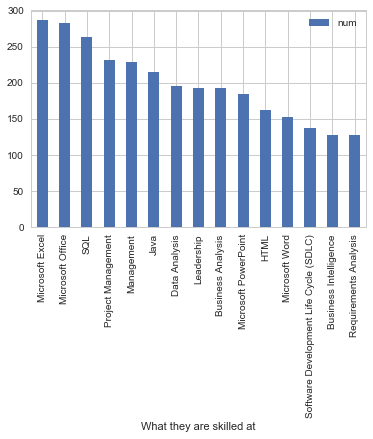

In [40]:
df4.num = df4.num.astype(int)
df4.plot.bar(x='What they are skilled at', y='num')

Get the data about top 10 skills in 2016 on linkedin.

In [41]:
import requests
page = requests.get("https://learning.linkedin.com/week-of-learning/top-skills") 
soup = BeautifulSoup(page.content, 'html.parser')

In [42]:
skills = soup.find_all('li', class_='link-list-item')
skills = [skill.get_text() for skill in skills]
skills

[u'\n\n#1 Cloud and Distributed Computing\n\n',
 u'\n\n#2 Statistical Analysis and Data Mining\n\n',
 u'\n\n#3 Web Architecture and Development Framework\n\n',
 u'\n\n#4 Middleware and Integration Software\n\n',
 u'\n\n#5 User Interface Design\n\n',
 u'\n\n#6 Network and Information Security\n\n',
 u'\n\n#7 Mobile Development\n\n',
 u'\n\n#8 Data Presentation\n\n',
 u'\n\n#9 SEO/SEM Marketing\n\n',
 u'\n\n#10 Storage Systems and Management\n\n']

In [43]:
skills = [skill.replace("\n", "").encode('ascii', 'ignore') for skill in skills]

In [44]:
skills

['#1 Cloud and Distributed Computing',
 '#2 Statistical Analysis and Data Mining',
 '#3 Web Architecture and Development Framework',
 '#4 Middleware and Integration Software',
 '#5 User Interface Design',
 '#6 Network and Information Security',
 '#7 Mobile Development',
 '#8 Data Presentation',
 '#9 SEO/SEM Marketing',
 '#10 Storage Systems and Management']

Get the class information from MSIS website to compare the hot skills.

In [45]:
from selenium import webdriver
import time
driver = webdriver.PhantomJS(executable_path='/Users/yuhaowang/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs') 
driver.get("https://www.scu.edu/business/ms-information-systems/curriculum/msis-courses/")  
time.sleep(3) # Sleep 3 seconds for the driver to load js page 
classes = driver.find_element_by_css_selector('div.panel-group').text
print classes
driver.close()

2601 : Object-Oriented Analysis and Programming
2602 : Information Systems Analysis & Design
2603 : Database Management Systems
2604 : Information Systems Policy and Strategy
2605 : Telecommunications & Business Networks
2606 : Software Project Management
2621 : Business Intelligence & Data Warehousing
2622 : ERP Systems
2623 : Financial Information Systems
2624 : E-Business Technologies: Virtualization and Cloud Computing
2627 : Big Data Modeling and Analytics
2628 : The Business of Cloud Computing
2629 : Dashboards, Scorecards and Visualization
2630 : Web Programming
2631 : Machine Learning
2640 : Capstone Project Proposal
2641 : Information Technology: Ethics and Public Policy
2642 : Capstone Project I
2643 : Capstone Project II
2644 : MSIS Master's Thesis
2645 : Capstone Design Proposal
2646 : Capstone Design Project I
2647 : Capstone Design Project II
2797 : Curricular Practicum Education
2798 : Extended Curricular Practicum Education
2801 : Mobile Payment and e_Commerce Security


In [46]:
classes = classes.split("\n")

In [47]:
skills_dict = {}
for skill in skills:
    skills_dict[skill[3:].strip()] = 0

In [48]:
from fuzzywuzzy import fuzz
for k, v in skills_dict.items():
    for c in classes:
        if fuzz.partial_ratio(k, c) >= 50:
            skills_dict[k] = 1
skills_dict

{'Cloud and Distributed Computing': 1,
 'Data Presentation': 1,
 'Middleware and Integration Software': 1,
 'Mobile Development': 1,
 'Network and Information Security': 1,
 'SEO/SEM Marketing': 0,
 'Statistical Analysis and Data Mining': 1,
 'Storage Systems and Management': 1,
 'User Interface Design': 1,
 'Web Architecture and Development Framework': 0}

In [49]:
skills_dict['Middleware and Integration Software'] = 0
skills_dict['Storage Systems and Management'] = 0
skills_dict['User Interface Design'] = 0
skills_dict['Web Architecture and Development Framework'] = 1

In [50]:
skills_dict

{'Cloud and Distributed Computing': 1,
 'Data Presentation': 1,
 'Middleware and Integration Software': 0,
 'Mobile Development': 1,
 'Network and Information Security': 1,
 'SEO/SEM Marketing': 0,
 'Statistical Analysis and Data Mining': 1,
 'Storage Systems and Management': 0,
 'User Interface Design': 0,
 'Web Architecture and Development Framework': 1}

In [51]:
data = pd.DataFrame({"Skills": skills_dict.keys(), "SCU Teaching": skills_dict.values(), "Market Needing": [1]*10})
data.sort_values(by="SCU Teaching", ascending=False,inplace=True)
data

,Market Needing,SCU Teaching,Skills
0,1,1,Cloud and Distributed Computing
1,1,1,Data Presentation
2,1,1,Statistical Analysis and Data Mining
3,1,1,Web Architecture and Development Framework
7,1,1,Mobile Development
9,1,1,Network and Information Security
4,1,0,Middleware and Integration Software
5,1,0,User Interface Design
6,1,0,Storage Systems and Management
8,1,0,SEO/SEM Marketing


From that charts, we can see the skills offerd from SCU MSIS program is over the half over, I think it can help me tell recrutiers and prospective students the benefits of choosing SCU MSIS program. 

In [52]:
trace1 = go.Bar(
    x=data["Skills"],
    y=data["SCU Teaching"],
    name='SCU Teaching'
)
trace2 = go.Bar(
    x=data["Skills"],
    y=data["Market Needing"],
    name='Market Needing'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')


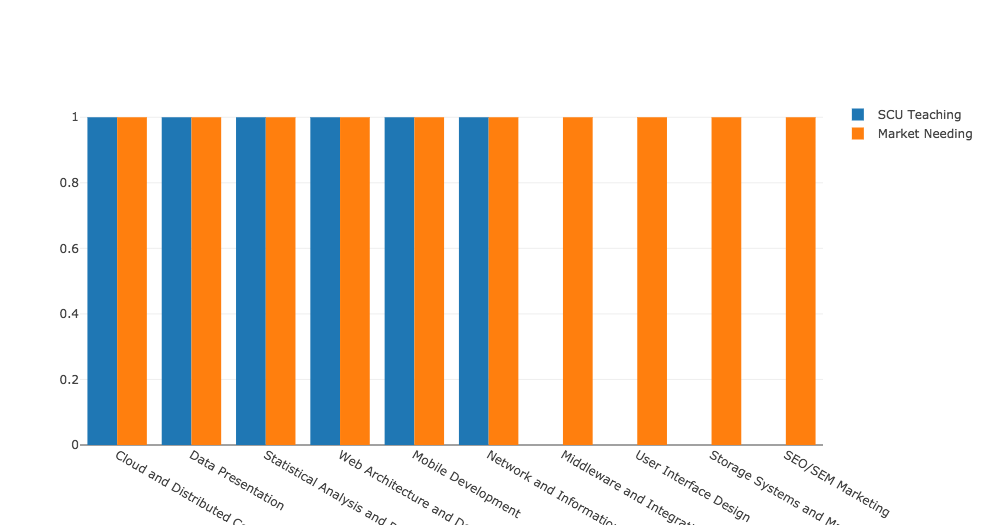

In [53]:
from IPython.display import Image
Image(filename='df4_bar.png')

<a id="section_ID"></a>
## Futher more, I also get the S&P 500 companies' data (<a href='https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'>link</a>), I will use this data to build a geo map to display the distribution of these companies.
